# Libraries Imported

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.display import display_html 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import ipywidgets as widgets
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Loaded

In [2]:
url = "https://raw.githubusercontent.com/tweaksneak/cyber-dataset/main/salaries_cyber.csv"
df = pd.read_csv(url)
column_names = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
df = pd.read_csv(url, names = column_names, nrows = 100, header = 0)
pd.options.display.show_dimensions = False
#print(df)

# Display Datatypes

In [3]:
#print(pd.to_numeric(df.salary_in_usd, errors='coerce').dtype)
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

# Number of Jobs by Experience Level

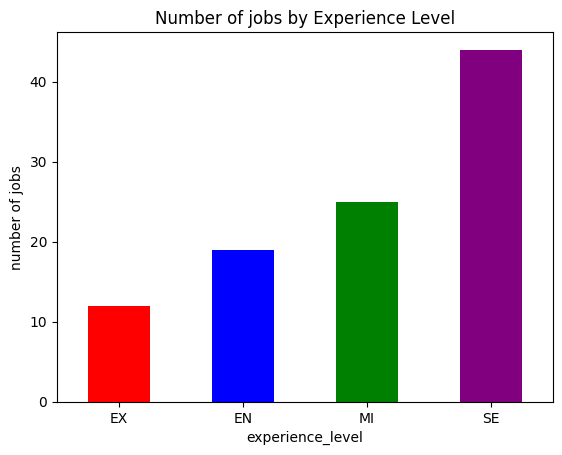

In [4]:
plt.xticks([])
num_types = df.groupby(by='experience_level').size()
bargraph = num_types.sort_values().plot.bar(ylabel = 'number of jobs', title = 'Number of jobs by Experience Level', color=['red','blue','green', 'purple'],rot=0)

# Percentage of Jobs Based on Experience

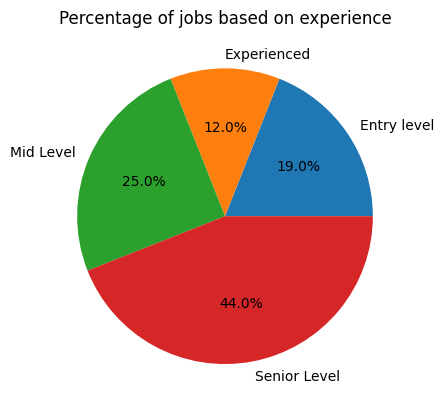

In [5]:
labels = 'Entry level', 'Experienced', 'Mid Level', 'Senior Level'
fig, ax = plt.subplots()
ax.set(title = 'Percentage of jobs based on experience')
piechart = ax.pie(num_types, labels=labels, autopct='%1.1f%%')

# Average Salary Based on Experience

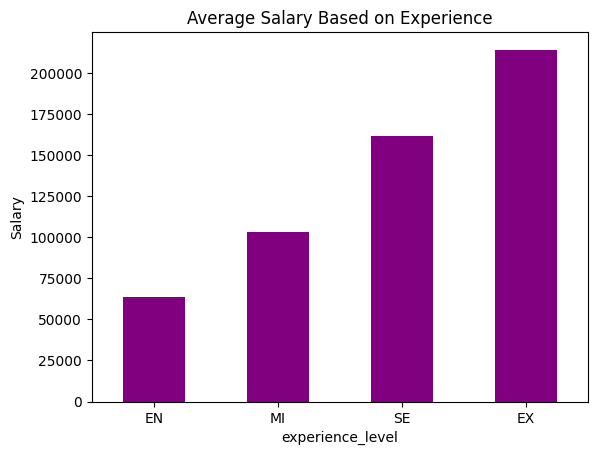

In [6]:
num_types = df.groupby(by='experience_level').salary_in_usd.mean()
barplot = num_types.sort_values().plot.bar(ylabel = 'Salary', title = 'Average Salary Based on Experience', color=['purple'],rot=0)

# Set Independent and Dependent Variables

In [7]:
X = pd.get_dummies(df.drop(columns=['work_year', 'job_title', 'salary_in_usd', 'employment_type', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'])) #indpendent variables
y = df[['salary_in_usd']].copy() #dependent variables

# Split the variable sets into Training and Testing Subsets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.333, random_state=21)

# Display variables

In [9]:
X_train_styler = X_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Independents variables')
y_train_styler = y_train.head(5).style.set_table_attributes("style='display:inline'").set_caption('Dependents variables')
space = "\xa0" * 10 #space between columns
display_html(X_train_styler._repr_html_()+ space  + y_train_styler._repr_html_(), raw=True)

Independents variables 
 
 
   
 experience_level_EN 
 experience_level_EX 
 experience_level_MI 
 experience_level_SE 
 
 
 
 
 14 
 0 
 1 
 0 
 0 
 
 
 67 
 0 
 0 
 0 
 1 
 
 
 92 
 0 
 0 
 1 
 0 
 
 
 65 
 0 
 0 
 0 
 1 
 
 
 47 
 0 
 1 
 0 
 0 
 
 
 
          
 
 Dependents variables 
 
 
   
 salary_in_usd 
 
 
 
 
 14 
 290000 
 
 
 67 
 245000 
 
 
 92 
 86500 
 
 
 65 
 207000 
 
 
 47 
 102000

# Train X and y

In [10]:
y_train_array, y_test_array = y_train['salary_in_usd'].values, y_test['salary_in_usd'].values
X_train_array, X_test_array = X_train.values, X_test.values

# Create Linear Regression Model and fit it with training data

In [11]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred= linear_reg_model.predict(X_test)

# Check Accuracy using R^2

In [12]:
r2_score(y_test, y_pred)

0.43118951152157314

# Prompt user to select experience level

In [13]:
user_selection = 1

yes = widgets.Dropdown(
        options=[('Entry level', 1), ('Mid level', 2), ('Senior Level', 3), ('Experienced', 4)],
        value=1,
        description='Level of experience:',
        disabled = False
        )

display(yes)

def callme(user_selection):
    
    if user_selection == 1:
        user_response = 'Entry Level'
        user_choice = [1,0,0,0]
    elif user_selection == 2:
        user_response = 'Middle Level'
        user_choice = [0,0,1,0]
    elif user_selection == 3:
        user_response = 'Senior Level'
        user_choice = [0,0,0,1]
    elif user_selection == 4:
        user_response = 'Experienced'
        user_choice = [0,1,0,0]
        
    print('You selected: ', user_response)
    column_names_short = ['experience_level_EN', 'experience_level_EX', 'experience_level_MI','experience_level_SE']
    input_df = pd.DataFrame(np.array([user_choice]), columns = column_names_short)

    user_pred = linear_reg_model.predict(input_df)
    print('The predicted salary based on your experience level is: ', user_pred)
    user_selection = yes.get_interact_value(
    
)

run_button = widgets.Button(description = 'Predict Salary')

from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        callme(yes.get_interact_value())

button.on_click(on_button_clicked)


Dropdown(description='Level of experience:', options=(('Entry level', 1), ('Mid level', 2), ('Senior Level', 3…

Button(description='Click Me!', style=ButtonStyle())

Output()